In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Online Retail.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df = df.dropna(subset=["CustomerID"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [6]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom


In [8]:
df = df.loc[df["Quantity"] > 0]

In [9]:
df.shape

(397924, 8)

In [10]:
df["Sales"] = (df["Quantity"] * df["UnitPrice"]).values

In [11]:
## Convert InvoiceDate from Object Type to Date Type
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [13]:
#RFM - Recency, Frequence and Monetary
#1. Monetary Value

In [14]:
df.shape

(397924, 9)

In [15]:
df.CustomerID.nunique()

4339

In [16]:
Monetry = df.groupby("CustomerID").Sales.sum()
Monetry = Monetry.reset_index()
Monetry

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [17]:
#1. Frequency Value

In [18]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales'],
      dtype='object')

In [19]:
frequency = df.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [20]:
MaxDate = max(df.InvoiceDate) + pd.DateOffset(days = 1)
MaxDate

Timestamp('2011-12-11 17:19:00')

In [21]:
df["Difference"] = MaxDate - df.InvoiceDate

In [22]:
recency = df.groupby("CustomerID").Difference.min()
recency = recency.reset_index()
recency

,CustomerID,Difference
0,12346.0,327 days 07:18:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00
...,...,...
4334,18280.0,161 days 07:27:00
4335,18281.0,5 days 06:26:00
4336,18282.0,217 days 03:44:00
4337,18283.0,11 days 04:20:00


In [23]:
recency.Difference = recency.Difference.dt.days
recency

,CustomerID,Difference
0,12346.0,327
1,12347.0,41
2,12348.0,77
3,12349.0,20
4,12350.0,312
...,...,...
4334,18280.0,161
4335,18281.0,5
4336,18282.0,217
4337,18283.0,11


In [24]:
MF = Monetry.merge(frequency, on="CustomerID")

In [25]:
RFM = MF.merge(recency, on="CustomerID")

In [26]:
RFM.columns = ["CustomerID", "Sales", "Frequency", "Recency"]

In [27]:
RFM

,CustomerID,Sales,Frequency,Recency
0,12346.0,77183.60,1,327
1,12347.0,4310.00,182,41
2,12348.0,1797.24,31,77
3,12349.0,1757.55,73,20
4,12350.0,334.40,17,312
...,...,...,...,...
4334,18280.0,180.60,10,161
4335,18281.0,80.82,7,5
4336,18282.0,178.05,12,217
4337,18283.0,2094.88,756,11


In [28]:
## Standard Scaler Value

In [29]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

In [30]:
# OUT = (x-mean)/std(data)

In [31]:
RFM_New = scaller.fit_transform(RFM)

In [32]:
#Apply K-Means with Some K

In [33]:
from sklearn.cluster import KMeans

In [34]:
SSD = []
K = []
for i in range(1, 10):
    model = KMeans(n_clusters=i)
    model.fit(RFM_New)
    SSD.append(model.inertia_)
    K.append(i)

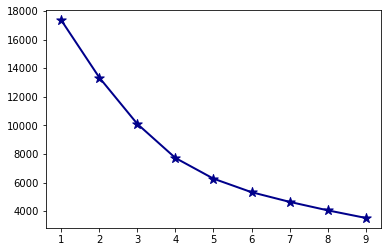

In [35]:
plt.plot(K, SSD, c ="darkblue", lw = 2)
plt.scatter(K, SSD, marker="*", s = 100, c = "darkblue")
plt.show()

In [36]:
model = KMeans(n_clusters=5)
ClusterId = model.fit_predict(RFM_New)

In [37]:
RFM["ClusterId"] = ClusterId

In [38]:
RFM.ClusterId.unique()

array([1, 0, 2, 3, 4])

In [39]:
RFM.head()

,CustomerID,Sales,Frequency,Recency,ClusterId
0,12346.0,77183.60,1,327,1
1,12347.0,4310.00,182,41,1
2,12348.0,1797.24,31,77,1
3,12349.0,1757.55,73,20,1
4,12350.0,334.40,17,312,0


In [40]:
All_Sales = RFM.groupby("ClusterId").Sales.mean()
All_Frequency = RFM.groupby("ClusterId").Frequency.mean()
All_Recency = RFM.groupby("ClusterId").Recency.mean()

In [41]:
final_data = pd.DataFrame({
    "Sales": All_Sales,
    "Frequency":All_Frequency,
    "Recency":All_Recency
})

In [42]:
final_data

,Sales,Frequency,Recency
ClusterId,,,
0,449.160747,27.148191,293.173862
1,2216.357278,100.994279,61.584668
2,190863.461667,827.833333,22.833333
3,70925.287500,5807.750000,5.000000
4,1869.723145,98.562645,59.595708


In [43]:
## Plot Pie Plot for all_data

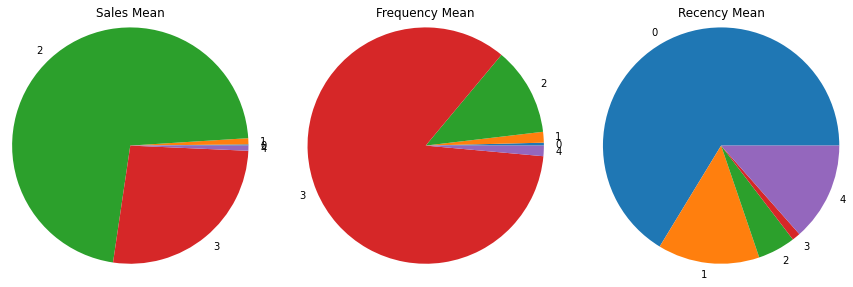

In [44]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 3, 1)
plt.title("Sales Mean")
ax.pie(final_data.Sales, labels = [0,1,2,3,4], radius = 1.2)


ax = fig.add_subplot(1, 3, 2)
plt.title("Frequency Mean")
ax.pie(final_data.Frequency, labels = [0,1,2,3,4], radius = 1.2)

ax = fig.add_subplot(1, 3, 3)
plt.title("Recency Mean")
ax.pie(final_data.Recency, labels = [0,1,2,3,4], radius = 1.2)


plt.show()